# 1.1 广义线性模型
## 1.1.1 普通最小二乘法
最小二乘法很经常用在线性回归Linear Regression,$\hat{y}=Xw+b$中，LR是用来拟合一个$$w=(w_1, w_2, w_3, ...)$$的线性模型，而最小二乘法在其中的作用是用来计算预测值和实际值之间的残差平法和，并且使其最小,其中loss function为：<br>
$J(\boldsymbol{w},b) = \frac{1}{2m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$<br>

然后再在梯度下降法Gradient Descent Optimization对系数w进行优化:<br>
$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$<br>
$ \frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big)$<br>
**说明：**<br>
$\hat{y}^{(i)}表示第i个样本的预测值$<br>
$y^{(i)} 表示第i个样本的真实值$<br>
$x^{(i)}_j$指的是第i个样本的第j个特征的值。<br>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # 模型评价指标
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 生成500个点数据
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

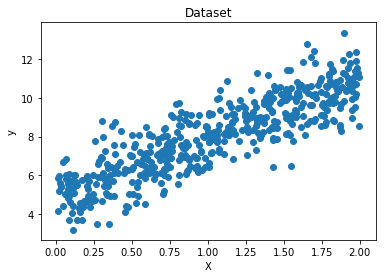

In [3]:
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# 下面使用Sklearn中的线性回归模型进行拟合
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# 再使用这个模型进行数据的预测
y_pred = lr.predict(X)
# 输出这个模型拟合的系数
print('The cofficients of lr is : ', lr.coef_)
# 计算mean squared error
print('The mse of the training sets is : ', mean_squared_error(y_true=y, y_pred=y_pred))

The cofficients of lr is :  [[2.96240407]]
The mse of the training sets is :  1.0211559204125902


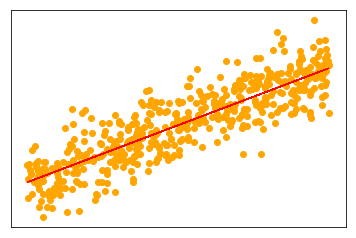

In [6]:
# 将模型拟合的图画出来
plt.scatter(X ,y, color='orange')
plt.plot(X, y_pred, color='red', linewidth=1)   # 拟合直线
plt.xticks([])
plt.yticks([])

plt.show()

由图可知，拟合的直线正好符合散点图的趋向

## 1.1.2 岭回归Ridge Regression
岭回归是线性回归的一个改善的版本，对系数施加L2正则：
$$min_w\mid\mid{Xw-y}\mid\mid_2^2 + \alpha\mid\mid{w}\mid\mid_2^2$$
其中α>=0, 是控制系数的收缩量的发杂性参数，α值越大，收缩量也就越大。<br>
梯度下降在Ridge上的运用就不再做详细的推导，同学们可以按照上面的Linear Regression的推导进行练习，不难的。

In [7]:
from sklearn.linear_model import Ridge

In [8]:
## 引用上面的数据
ridge = Ridge(alpha=0.5)
ridge.fit(X, y)
# 再使用这个模型进行数据的预测
y_pred = ridge.predict(X)
# 输出这个模型拟合的系数
print('The cofficients of lr is : ', ridge.coef_)
# 计算mean squared error
print('The mse of the training sets is : ', mean_squared_error(y_true=y, y_pred=y_pred))

The cofficients of lr is :  [[2.95353309]]
The mse of the training sets is :  1.0211821211546113


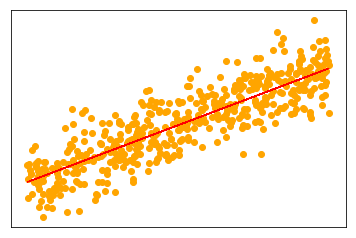

In [9]:
# 将模型拟合的图画出来
plt.scatter(X ,y, color='orange')
plt.plot(X, y_pred, color='red', linewidth=1)   # 拟合直线
plt.xticks([])
plt.yticks([])

plt.show()

在小型的数据集上，可能与无正则项的Linear Regression相差不大，但是加入正则项是可以是模型更加的鲁棒。

In [10]:
# 我们还可以为岭回归添加交叉性验证
from sklearn.linear_model import RidgeCV

In [11]:
rid_cv = RidgeCV()   # alpha=(0.1, 1.0, 10.0)  # 通过cv找到更好的alpha系数
rid_cv.fit(X, y)
# 再使用这个模型进行数据的预测
y_pred = rid_cv.predict(X)
# 输出这个模型拟合的系数
print('The cofficients of lr is : ', rid_cv.coef_)
# 计算mean squared error
print('The mse of the training sets is : ', mean_squared_error(y_true=y, y_pred=y_pred))

The cofficients of lr is :  [[2.96062561]]
The mse of the training sets is :  1.0211569734817323


## 1.1.3 Lasso
Lasso也是线性回归的一个改善模型，不过这个是加入了L1正则项，以获得稀疏解：
$$min_w\mid\mid{Xw-y}\mid\mid_2^2 + \alpha\mid\mid{w}\mid\mid_1$$

In [12]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.1)
reg.fit(X, y)
# 再使用这个模型进行数据的预测
y_pred = reg.predict(X)
# 输出这个模型拟合的系数
print('The cofficients of lr is : ', reg.coef_)
# 计算mean squared error
print('The mse of the training sets is : ', mean_squared_error(y_true=y, y_pred=y_pred))

The cofficients of lr is :  [2.6620525]
The mse of the training sets is :  1.051191077640339
